In [4]:
import pandas as pd

# Load train.csv
train_df = pd.read_csv("../dataset/train.csv")
train_df.head()


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [8]:
# For data handling
import pandas as pd
import numpy as np

# To show all columns nicely
pd.set_option('display.max_columns', None)




In [12]:
# Load train.csv
train_path = "../dataset/train.csv"
train_df = pd.read_csv(train_path)

# Show first 5 rows
train_df.head()


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [14]:
# Shape of dataset (rows, columns)
print("Training data shape:", train_df.shape)

# Column names and data types
print("\nColumns and data types:")
print(train_df.dtypes)

# Missing values
print("\nMissing values per column:")
print(train_df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(train_df.describe())


Training data shape: (75000, 4)

Columns and data types:
sample_id            int64
catalog_content     object
image_link          object
price              float64
dtype: object

Missing values per column:
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

Summary statistics:
           sample_id         price
count   75000.000000  75000.000000
mean   149841.917707     23.647654
std     86585.346513     33.376932
min         0.000000      0.130000
25%     73845.750000      6.795000
50%    150129.000000     14.000000
75%    225040.250000     28.625000
max    299438.000000   2796.000000


In [16]:
# Sample product descriptions
train_df['catalog_content'].head(3)

# Sample image links
train_df['image_link'].head(3)


0    https://m.media-amazon.com/images/I/51mo8htwTH...
1    https://m.media-amazon.com/images/I/71YtriIHAA...
2    https://m.media-amazon.com/images/I/51+PFEe-w-...
Name: image_link, dtype: object

In [18]:
# Text processing
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [20]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers except words
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply to the catalog_content column
train_df['cleaned_content'] = train_df['catalog_content'].apply(clean_text)

# Check first 5 rows
train_df[['catalog_content', 'cleaned_content']].head()


,catalog_content,cleaned_content
0,"Item Name: La Victoria Green Taco Sauce Mild, ...",item name la victoria green taco sauce mild ou...
1,"Item Name: Salerno Cookies, The Original Butte...",item name salerno cookies the original butter ...
2,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",item name bear creek hearty soup bowl creamy c...
3,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,item name judees blue cheese powder oz glutenf...
4,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",item name kedem sherry cooking wine ounce per ...


In [22]:
train_df['desc_length'] = train_df['cleaned_content'].apply(len)


In [24]:
train_df['word_count'] = train_df['cleaned_content'].apply(lambda x: len(x.split()))


In [26]:
keywords = ['pack', 'set', 'kg', 'ml', 'ltr', 'oz']

for kw in keywords:
    train_df[kw+'_present'] = train_df['cleaned_content'].apply(lambda x: 1 if kw in x else 0)


In [28]:
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(train_df['cleaned_content'])


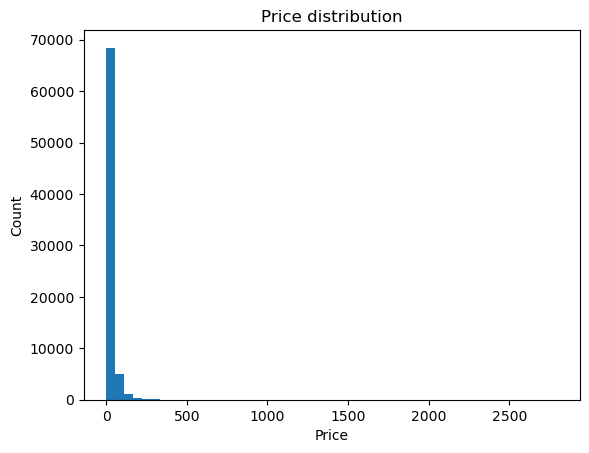

In [32]:
import matplotlib.pyplot as plt

# Histogram of prices
plt.hist(train_df['price'], bins=50)
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [36]:
train_df.head()

,sample_id,catalog_content,image_link,price,cleaned_content,desc_length,word_count,pack_present,set_present,kg_present,ml_present,ltr_present,oz_present
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,item name la victoria green taco sauce mild ou...,74,15,1,0,0,0,0,1
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,item name salerno cookies the original butter ...,462,69,1,0,0,0,0,0
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,item name bear creek hearty soup bowl creamy c...,292,50,1,0,0,0,0,0
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,item name judees blue cheese powder oz glutenf...,1239,197,0,0,0,0,0,1
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,item name kedem sherry cooking wine ounce per ...,121,21,0,0,0,0,0,0


In [38]:
train_df.head(10)

,sample_id,catalog_content,image_link,price,cleaned_content,desc_length,word_count,pack_present,set_present,kg_present,ml_present,ltr_present,oz_present
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,item name la victoria green taco sauce mild ou...,74,15,1,0,0,0,0,1
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,item name salerno cookies the original butter ...,462,69,1,0,0,0,0,0
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,item name bear creek hearty soup bowl creamy c...,292,50,1,0,0,0,0,0
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,item name judees blue cheese powder oz glutenf...,1239,197,0,0,0,0,0,1
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,item name kedem sherry cooking wine ounce per ...,121,21,0,0,0,0,0,0
5,9259,"Item Name: Member's Mark Member's Mark, Basil,...",https://m.media-amazon.com/images/I/81nw0HXpCR...,18.50,item name members mark members mark basil oz b...,192,33,1,0,0,0,0,1
6,191846,Item Name: Goya Foods Sazonador Total Seasonin...,https://m.media-amazon.com/images/I/61dH2Ebkt0...,5.99,item name goya foods sazonador total seasoning...,1243,213,1,0,0,0,1,1
7,222007,Item Name: VineCo Original Series Chilean Sauv...,https://m.media-amazon.com/images/I/71JllaFpxM...,94.00,item name vineco original series chilean sauvi...,2210,345,0,0,0,0,0,0
8,37614,Item Name: NATURES PATH CEREAL FLK MULTIGRAIN ...,https://m.media-amazon.com/images/I/21O9RftI2v...,35.74,item name natures path cereal flk multigrain o...,75,15,0,0,0,0,0,1
9,238044,Item Name: Mrs. Miller's Seedless Black Raspbe...,https://m.media-amazon.com/images/I/41miQk+RkJ...,31.80,item name mrs millers seedless black raspberry...,1001,176,1,0,0,0,0,0


In [80]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import Ridge

In [82]:
image_folder = "../outputs/images"
image_features = []

for idx, row in tqdm(train_df.head(100).iterrows(), total=100):
    img_path = os.path.join(image_folder, f"{row['sample_id']}.jpg")
    feats = extract_features(img_path)  # Your feature extraction function
    image_features.append(feats)

image_features = np.array(image_features)
print("Original image features shape:", image_features.shape)

  0%|                                                                                                                              | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  1%|█▏                                                                                                                    | 1/100 [00:00<00:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  2%|██▎                                                                                                                   | 2/100 [00:01<00:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


  3%|███▌                                                                                                                  | 3/100 [00:01<00:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


  4%|████▋                                                                                                                 | 4/100 [00:02<01:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


  5%|█████▉                                                                                                                | 5/100 [00:03<01:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


  6%|███████                                                                                                               | 6/100 [00:03<01:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


  7%|████████▎                                                                                                             | 7/100 [00:04<00:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  8%|█████████▍                                                                                                            | 8/100 [00:05<01:03,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


  9%|██████████▌                                                                                                           | 9/100 [00:06<01:06,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 10%|███████████▋                                                                                                         | 10/100 [00:06<01:02,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 11%|████████████▊                                                                                                        | 11/100 [00:07<00:57,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 12%|██████████████                                                                                                       | 12/100 [00:07<00:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 13%|███████████████▏                                                                                                     | 13/100 [00:08<00:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 14%|████████████████▍                                                                                                    | 14/100 [00:09<00:58,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 15%|█████████████████▌                                                                                                   | 15/100 [00:10<01:01,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 16%|██████████████████▋                                                                                                  | 16/100 [00:10<00:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 17%|███████████████████▉                                                                                                 | 17/100 [00:11<00:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 18%|█████████████████████                                                                                                | 18/100 [00:12<01:01,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 19%|██████████████████████▏                                                                                              | 19/100 [00:12<00:58,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 20%|███████████████████████▍                                                                                             | 20/100 [00:13<00:55,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 21%|████████████████████████▌                                                                                            | 21/100 [00:14<00:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


 22%|█████████████████████████▋                                                                                           | 22/100 [00:14<00:53,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 23%|██████████████████████████▉                                                                                          | 23/100 [00:15<00:56,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 24%|████████████████████████████                                                                                         | 24/100 [00:16<00:50,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 25%|█████████████████████████████▎                                                                                       | 25/100 [00:16<00:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 26%|██████████████████████████████▍                                                                                      | 26/100 [00:17<00:42,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 27%|███████████████████████████████▌                                                                                     | 27/100 [00:17<00:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 28%|████████████████████████████████▊                                                                                    | 28/100 [00:18<00:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 29%|█████████████████████████████████▉                                                                                   | 29/100 [00:19<00:45,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 30%|███████████████████████████████████                                                                                  | 30/100 [00:19<00:49,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 31%|████████████████████████████████████▎                                                                                | 31/100 [00:20<00:48,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 32%|█████████████████████████████████████▍                                                                               | 32/100 [00:21<00:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 33%|██████████████████████████████████████▌                                                                              | 33/100 [00:22<00:46,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 34%|███████████████████████████████████████▊                                                                             | 34/100 [00:22<00:42,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 35%|████████████████████████████████████████▉                                                                            | 35/100 [00:22<00:38,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 36%|██████████████████████████████████████████                                                                           | 36/100 [00:23<00:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 37%|███████████████████████████████████████████▎                                                                         | 37/100 [00:24<00:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 38%|████████████████████████████████████████████▍                                                                        | 38/100 [00:24<00:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 39%|█████████████████████████████████████████████▋                                                                       | 39/100 [00:25<00:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 40%|██████████████████████████████████████████████▊                                                                      | 40/100 [00:25<00:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


 41%|███████████████████████████████████████████████▉                                                                     | 41/100 [00:26<00:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 42%|█████████████████████████████████████████████████▏                                                                   | 42/100 [00:27<00:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 43%|██████████████████████████████████████████████████▎                                                                  | 43/100 [00:27<00:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 44%|███████████████████████████████████████████████████▍                                                                 | 44/100 [00:28<00:33,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 45%|████████████████████████████████████████████████████▋                                                                | 45/100 [00:28<00:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 46%|█████████████████████████████████████████████████████▊                                                               | 46/100 [00:29<00:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 47%|██████████████████████████████████████████████████████▉                                                              | 47/100 [00:29<00:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 48%|████████████████████████████████████████████████████████▏                                                            | 48/100 [00:30<00:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 49%|█████████████████████████████████████████████████████████▎                                                           | 49/100 [00:30<00:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 50%|██████████████████████████████████████████████████████████▌                                                          | 50/100 [00:31<00:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 51%|███████████████████████████████████████████████████████████▋                                                         | 51/100 [00:32<00:26,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 52%|████████████████████████████████████████████████████████████▊                                                        | 52/100 [00:33<00:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 53%|██████████████████████████████████████████████████████████████                                                       | 53/100 [00:33<00:31,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 54%|███████████████████████████████████████████████████████████████▏                                                     | 54/100 [00:34<00:29,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 55%|████████████████████████████████████████████████████████████████▎                                                    | 55/100 [00:34<00:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 56%|█████████████████████████████████████████████████████████████████▌                                                   | 56/100 [00:35<00:29,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 57/100 [00:36<00:29,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 58/100 [00:36<00:26,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 59%|█████████████████████████████████████████████████████████████████████                                                | 59/100 [00:37<00:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 60%|██████████████████████████████████████████████████████████████████████▏                                              | 60/100 [00:38<00:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 61%|███████████████████████████████████████████████████████████████████████▎                                             | 61/100 [00:38<00:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 62%|████████████████████████████████████████████████████████████████████████▌                                            | 62/100 [00:39<00:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 63/100 [00:39<00:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 64%|██████████████████████████████████████████████████████████████████████████▉                                          | 64/100 [00:40<00:22,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 65%|████████████████████████████████████████████████████████████████████████████                                         | 65/100 [00:41<00:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 66/100 [00:41<00:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 67/100 [00:42<00:20,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 68%|███████████████████████████████████████████████████████████████████████████████▌                                     | 68/100 [00:43<00:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 69%|████████████████████████████████████████████████████████████████████████████████▋                                    | 69/100 [00:43<00:19,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████▉                                   | 70/100 [00:44<00:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 71/100 [00:44<00:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 72/100 [00:45<00:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████▍                               | 73/100 [00:45<00:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 74/100 [00:46<00:15,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 75/100 [00:47<00:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████▉                            | 76/100 [00:47<00:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████                           | 77/100 [00:48<00:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████▎                         | 78/100 [00:48<00:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 79/100 [00:49<00:12,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 80/100 [00:50<00:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 81/100 [00:50<00:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 82/100 [00:51<00:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████                    | 83/100 [00:52<00:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 84/100 [00:52<00:10,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 85/100 [00:53<00:10,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 86/100 [00:54<00:09,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 87/100 [00:54<00:08,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 88/100 [00:55<00:08,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 89/100 [00:56<00:06,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 90/100 [00:56<00:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 91/100 [00:57<00:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 92/100 [00:57<00:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 93/100 [00:58<00:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 94/100 [00:58<00:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 95/100 [00:59<00:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 96/100 [01:00<00:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 97/100 [01:00<00:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 98/100 [01:01<00:01,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 99/100 [01:02<00:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.60it/s]

Original image features shape: (100, 2048)


In [83]:
pca = PCA(n_components=50)  # Reduce to 50 features
image_features_reduced = pca.fit_transform(image_features)
print("Reduced image features shape:", image_features_reduced.shape)  # (100, 50)

Reduced image features shape: (100, 50)


In [86]:
image_features_sparse = csr_matrix(image_features_reduced)

In [88]:
X_combined = hstack([tfidf_matrix[:100], image_features_sparse])
print("Combined features shape:", X_combined.shape)  # e.g., (100, 5050)

Combined features shape: (100, 5050)


In [90]:
y = train_df['price'].values[:100]  # Target column

model = Ridge(alpha=1.0)
model.fit(X_combined, y)

Ridge()

In [92]:
y_pred = model.predict(X_combined)
print("Predictions shape:", y_pred.shape) 

Predictions shape: (100,)


In [94]:
y_pred = y_pred.reshape(-1, 1)
print(y_pred.shape)  # (100, 1)

(100, 1)


In [96]:
from sklearn.metrics import mean_squared_error, r2_score

# y = true prices
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 233.47
R^2 Score: 0.86


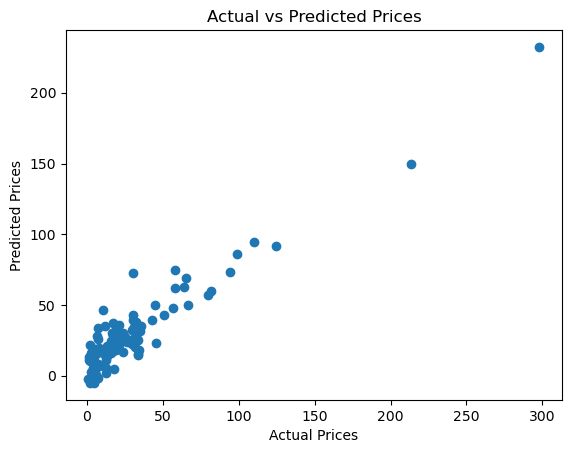

In [98]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [100]:
from sklearn.metrics import mean_squared_error, r2_score

# y = true prices
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 233.47
R^2 Score: 0.86


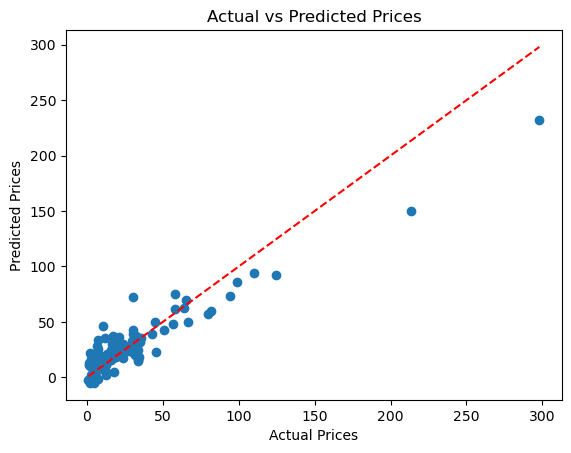

In [103]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')  # Line y=x for reference
plt.show()


In [107]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)  # smaller or larger value
model.fit(X_combined, y)
y_pred = model.predict(X_combined)


In [109]:
print(y_pred)          # shows all predicted prices
print(y_pred.shape)    # shows shape, e.g., (100,)

[6.53368342e+00 1.48773446e+01 6.29498903e+00 3.24896816e+01
 6.38493938e+01 2.07232477e+01 5.20204877e+00 9.05557359e+01
 3.52754334e+01 2.97246198e+01 1.62844586e+01 3.19314366e+01
 1.20724069e+01 4.35463232e+00 3.36729839e+00 7.75751498e+01
 5.56048795e+01 8.04504643e+00 1.06975177e+02 4.91382584e+01
 9.63864661e+01 3.31503454e+01 1.17438262e+01 5.59072495e+00
 1.94163645e+01 1.71329349e+01 1.71009837e+01 2.12666602e+01
 3.15960621e+00 2.17126339e+01 1.35710026e+01 1.14663029e+01
 6.57989678e+01 3.14642956e+01 2.28729827e+01 1.39297856e+01
 1.07721440e+01 2.85316670e+01 1.17716137e+02 1.85143275e+01
 7.50427429e+00 1.29363120e+01 7.24074624e+00 5.86540843e+01
 1.62454556e+01 3.04914523e+01 1.06335123e+01 3.08989225e+01
 4.96149536e+00 5.46013337e+00 3.19620991e-01 1.07264075e+01
 3.20346743e+01 3.36484896e+01 1.81323338e+00 2.08372390e+01
 6.16259077e+01 2.54962472e+01 1.89649874e+01 1.80552809e+01
 6.36710734e+01 1.20784674e+01 1.07748199e+01 2.84925403e+01
 1.52373756e+01 7.543995

In [111]:
y_pred = y_pred.reshape(-1, 1)
print(y_pred.shape)    # now (100, 1)

(100, 1)


In [113]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 8.67
R²: 0.99


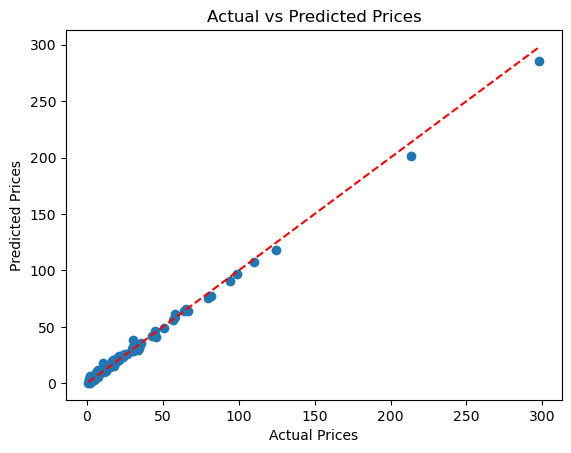

In [115]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')  # reference line y=x
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [117]:
from sklearn.linear_model import Ridge

for alpha in [0.01, 0.1, 1.0, 10.0]:
    model = Ridge(alpha=alpha)
    model.fit(X_combined, y)
    y_pred_new = model.predict(X_combined)
    print(f"Ridge(alpha={alpha}) -> MSE: {mean_squared_error(y, y_pred_new):.2f}, R²: {r2_score(y, y_pred_new):.2f}")


Ridge(alpha=0.01) -> MSE: 0.11, R²: 1.00
Ridge(alpha=0.1) -> MSE: 8.67, R²: 0.99
Ridge(alpha=1.0) -> MSE: 233.47, R²: 0.86
Ridge(alpha=10.0) -> MSE: 725.60, R²: 0.57


In [119]:
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [121]:
image_folder = "../outputs/images"
image_features = []

for idx, row in tqdm(train_df.iterrows(), total=len(train_df)):
    img_path = os.path.join(image_folder, f"{row['sample_id']}.jpg")
    feats = extract_features(img_path)  # your feature extraction function
    image_features.append(feats)

image_features = np.array(image_features)
print("Original image features shape:", image_features.shape)  # (n_samples, 2048)

  0%|                                                                                                                            | 0/75000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  0%|                                                                                                                 | 1/75000 [00:01<24:41:02,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  0%|                                                                                                                 | 2/75000 [00:01<16:20:09,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  0%|                                                                                                                 | 3/75000 [00:02<13:31:23,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  0%|                                                                                                                 | 4/75000 [00:02<12:04:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  0%|                                                                                                                 | 5/75000 [00:03<11:36:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


  0%|                                                                                                                 | 6/75000 [00:03<11:33:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  0%|                                                                                                                 | 7/75000 [00:04<12:09:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


  0%|                                                                                                                 | 8/75000 [00:05<15:31:59,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  0%|                                                                                                                 | 9/75000 [00:05<13:47:24,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


  0%|                                                                                                                | 10/75000 [00:06<12:57:21,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  0%|                                                                                                                | 11/75000 [00:06<12:08:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


  0%|                                                                                                                | 12/75000 [00:07<11:48:55,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  0%|                                                                                                                | 13/75000 [00:07<11:20:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  0%|                                                                                                                | 14/75000 [00:08<11:08:56,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  0%|                                                                                                                | 15/75000 [00:09<12:35:26,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  0%|                                                                                                                | 16/75000 [00:09<11:53:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  0%|                                                                                                                | 17/75000 [00:10<11:47:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


  0%|                                                                                                                | 18/75000 [00:11<14:00:17,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


  0%|                                                                                                                | 19/75000 [00:11<13:22:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  0%|                                                                                                                | 20/75000 [00:12<12:41:34,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


  0%|                                                                                                                | 21/75000 [00:12<12:05:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  0%|                                                                                                                | 22/75000 [00:13<11:41:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  0%|                                                                                                                | 23/75000 [00:14<13:08:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  0%|                                                                                                                | 24/75000 [00:14<12:13:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  0%|                                                                                                                | 25/75000 [00:15<11:45:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  0%|                                                                                                                | 26/75000 [00:15<11:18:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  0%|                                                                                                                | 27/75000 [00:16<11:42:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  0%|                                                                                                                | 28/75000 [00:16<12:20:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  0%|                                                                                                                | 29/75000 [00:17<12:47:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  0%|                                                                                                                | 30/75000 [00:18<12:14:51,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


  0%|                                                                                                                | 31/75000 [00:18<12:01:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  0%|                                                                                                                | 32/75000 [00:19<13:01:42,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  0%|                                                                                                                | 33/75000 [00:20<13:20:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  0%|                                                                                                                | 34/75000 [00:20<12:29:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  0%|                                                                                                                | 35/75000 [00:21<12:02:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  0%|                                                                                                                | 36/75000 [00:21<11:28:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


  0%|                                                                                                                | 37/75000 [00:22<12:03:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  0%|                                                                                                                | 38/75000 [00:22<12:56:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  0%|                                                                                                                | 39/75000 [00:23<12:14:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  0%|                                                                                                                | 40/75000 [00:24<12:04:48,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


  0%|                                                                                                                | 41/75000 [00:24<11:39:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  0%|                                                                                                                | 42/75000 [00:25<13:14:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


  0%|                                                                                                                | 43/75000 [00:25<13:02:20,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  0%|                                                                                                                | 44/75000 [00:26<12:22:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  0%|                                                                                                                | 45/75000 [00:26<11:49:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


  0%|                                                                                                                | 46/75000 [00:27<14:20:09,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  0%|                                                                                                                | 47/75000 [00:28<13:13:37,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  0%|                                                                                                                | 48/75000 [00:29<12:35:57,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  0%|                                                                                                                | 49/75000 [00:29<11:43:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  0%|                                                                                                                | 50/75000 [00:30<13:12:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  0%|                                                                                                                | 51/75000 [00:30<12:26:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  0%|                                                                                                                | 52/75000 [00:31<12:47:32,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  0%|                                                                                                                | 53/75000 [00:32<12:35:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  0%|                                                                                                                | 54/75000 [00:32<12:31:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


  0%|                                                                                                                | 55/75000 [00:33<13:41:43,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  0%|                                                                                                                | 56/75000 [00:34<14:08:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  0%|                                                                                                                | 57/75000 [00:34<14:06:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


  0%|                                                                                                                | 58/75000 [00:35<12:57:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  0%|                                                                                                                | 59/75000 [00:35<12:05:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  0%|                                                                                                                | 60/75000 [00:36<11:24:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


  0%|                                                                                                                | 61/75000 [00:37<12:56:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  0%|                                                                                                                | 62/75000 [00:37<12:02:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  0%|                                                                                                                | 63/75000 [00:38<11:43:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


  0%|                                                                                                                | 64/75000 [00:39<14:30:03,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  0%|                                                                                                                | 65/75000 [00:40<16:13:47,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  0%|                                                                                                                | 66/75000 [00:40<15:57:41,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


  0%|                                                                                                                | 67/75000 [00:41<16:19:33,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  0%|                                                                                                                | 68/75000 [00:42<17:43:38,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  0%|                                                                                                                | 69/75000 [00:43<16:40:12,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  0%|                                                                                                                | 70/75000 [00:43<14:56:22,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


  0%|                                                                                                                | 71/75000 [00:44<16:15:44,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


  0%|                                                                                                                | 72/75000 [00:45<15:06:19,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  0%|                                                                                                                | 73/75000 [00:46<15:32:36,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  0%|                                                                                                                | 74/75000 [00:46<15:08:50,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  0%|                                                                                                                | 75/75000 [00:47<13:46:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  0%|                                                                                                                | 76/75000 [00:47<12:42:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  0%|                                                                                                                | 77/75000 [00:48<12:51:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  0%|                                                                                                                | 78/75000 [00:48<12:10:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  0%|                                                                                                                | 79/75000 [00:49<11:38:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


  0%|                                                                                                                | 80/75000 [00:50<12:12:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  0%|                                                                                                                | 81/75000 [00:51<14:08:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  0%|                                                                                                                | 82/75000 [00:51<15:01:43,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  0%|                                                                                                                | 83/75000 [00:52<15:38:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  0%|▏                                                                                                               | 84/75000 [00:53<15:29:39,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


  0%|▏                                                                                                               | 85/75000 [00:54<14:49:13,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


  0%|▏                                                                                                               | 86/75000 [00:54<13:51:08,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  0%|▏                                                                                                               | 87/75000 [00:55<13:30:25,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


  0%|▏                                                                                                               | 88/75000 [00:55<13:43:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


  0%|▏                                                                                                               | 89/75000 [00:56<12:55:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  0%|▏                                                                                                               | 90/75000 [00:56<12:08:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  0%|▏                                                                                                               | 91/75000 [00:57<12:05:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  0%|▏                                                                                                               | 92/75000 [00:57<11:47:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


  0%|▏                                                                                                               | 93/75000 [00:58<11:44:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


  0%|▏                                                                                                               | 94/75000 [00:59<12:20:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


  0%|▏                                                                                                               | 95/75000 [00:59<12:24:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


  0%|▏                                                                                                               | 96/75000 [01:00<13:54:28,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


  0%|▏                                                                                                               | 97/75000 [01:01<13:51:07,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  0%|▏                                                                                                               | 98/75000 [01:01<13:08:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  0%|▏                                                                                                               | 99/75000 [01:02<14:36:00,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75000/75000 [01:33<00:00, 800.19it/s]


Original image features shape: (75000, 2048)


In [122]:
n_samples = image_features.shape[0]
pca_components = min(n_samples, 50)  # choose <= n_samples
pca = PCA(n_components=pca_components)
image_features_reduced = pca.fit_transform(image_features)
print("Reduced image features shape:", image_features_reduced.shape)  # (n_samples, pca_components)

Reduced image features shape: (75000, 50)


In [125]:
image_features_sparse = csr_matrix(image_features_reduced)
X_combined = hstack([tfidf_matrix, image_features_sparse])
print("Combined feature matrix shape:", X_combined.shape)  # (n_samples, tfidf + pca_components)

Combined feature matrix shape: (75000, 5050)


In [127]:
y = train_df['price'].values
model = Ridge(alpha=0.1)  # adjust alpha if needed
model.fit(X_combined, y)

Ridge(alpha=0.1)

In [128]:
y_pred = model.predict(X_combined)
y_pred = y_pred.reshape(-1, 1)
y_pred_rounded = np.round(y_pred, 2)
print("Predictions for all samples:\n", y_pred_rounded)

Predictions for all samples:
 [[ 3.03]
 [23.93]
 [30.94]
 ...
 [32.86]
 [22.1 ]
 [ 4.94]]


In [131]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 729.69
R^2 Score: 0.34


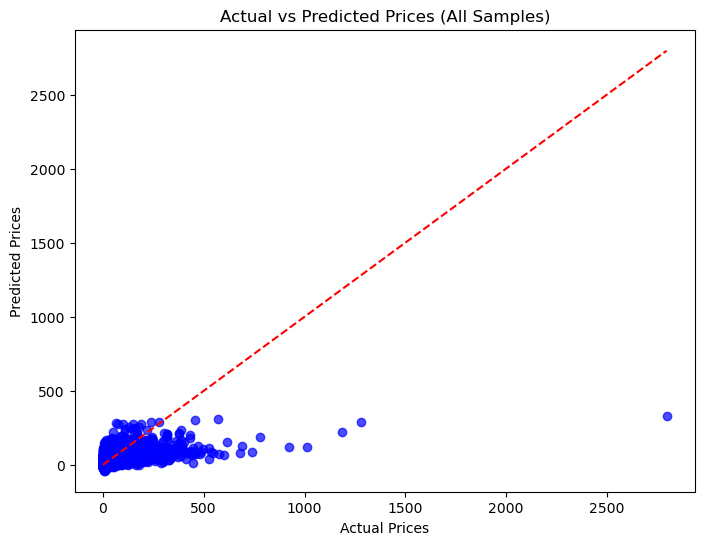

In [133]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')  # reference line y=x
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (All Samples)")
plt.show()

In [135]:
import pandas as pd

# Create a DataFrame with sample_id and predicted price
output_df = pd.DataFrame({
    "sample_id": train_df['sample_id'],
    "predicted_price": y_pred_rounded.flatten()  # flatten to 1D
})

# Save to CSV
output_file = "predicted_prices.csv"
output_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")

Predictions saved to predicted_prices.csv


In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

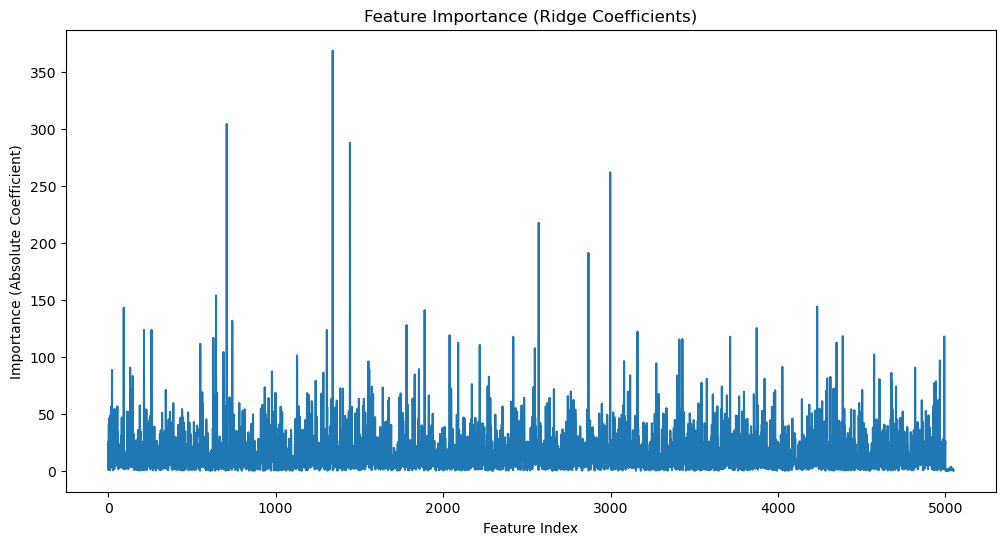

In [143]:
coefs = np.abs(model.coef_)
plt.figure(figsize=(12,6))
plt.plot(coefs)
plt.title("Feature Importance (Ridge Coefficients)")
plt.xlabel("Feature Index")
plt.ylabel("Importance (Absolute Coefficient)")
plt.show()

In [145]:
# Optional: highlight top 10 features
top_features_idx = np.argsort(coefs)[-10:]
print("Top 10 most important features indices:", top_features_idx)

Top 10 most important features indices: [1890   93 4234  644 2868 2571 2998 1444  708 1341]


In [147]:
# 9.2 Error Analysis
# -----------------------------
errors = np.abs(y - y_pred.flatten())
top_errors_idx = np.argsort(errors)[-10:]  # top 10 largest errors
print("\nTop 10 samples with highest prediction errors:")
print(train_df.iloc[top_errors_idx])
print("Prediction error values:", errors[top_errors_idx])


Top 10 samples with highest prediction errors:
       sample_id                                    catalog_content  \
34167     218412  Item Name: Mega Bulk Candy-Filled Plastic East...   
45580     272914  Item Name: Topps Juicy Drop Pop, 18 count per ...   
72853     262694  Item Name: Numanna Family Pack Bucket 432 Serv...   
56075     227791  Item Name: Alex's Low Acid Organic Coffee Ulti...   
73067     190026  Item Name: Crystal Geyser Pallet Of 84 Cases, ...   
68388     236048  Item Name: Organic Pistachios Shelled Raw, 30 ...   
46301     195806  Item Name: China Beauty Rings Tea (Loose) (8 o...   
22839      62251  Item Name: 495 days proteins meal 33 bottles x...   
32153     134909  Item Name: Royal Amber Osetra Caviar - Russian...   
58617     229126  Item Name: 4Patriots 1-Year Survival Food Kit:...   

                                              image_link    price  \
34167  https://m.media-amazon.com/images/I/81Xm7rANzq...   600.59   
45580  https://m.media-amazon.co

In [149]:
# 9.3 Predicted Price Range (±1 standard deviation)
# -----------------------------
price_mean = y_pred.flatten()
price_std = np.std(y - price_mean)  # standard deviation of residuals

print("\nPredicted price ranges for first 10 samples:")
for i in range(10):
    lower = price_mean[i] - price_std
    upper = price_mean[i] + price_std
    print(f"Sample {train_df['sample_id'].iloc[i]}: {lower:.2f} - {upper:.2f} (Predicted: {price_mean[i]:.2f})")


Predicted price ranges for first 10 samples:
Sample 33127: -23.98 - 30.04 (Predicted: 3.03)
Sample 198967: -3.09 - 50.94 (Predicted: 23.93)
Sample 261251: 3.93 - 57.96 (Predicted: 30.94)
Sample 55858: 18.27 - 72.30 (Predicted: 45.28)
Sample 292686: 57.55 - 111.57 (Predicted: 84.56)
Sample 9259: 18.06 - 72.09 (Predicted: 45.07)
Sample 191846: -32.00 - 22.03 (Predicted: -4.98)
Sample 222007: 43.56 - 97.59 (Predicted: 70.58)
Sample 37614: -3.86 - 50.17 (Predicted: 23.15)
Sample 238044: -14.33 - 39.70 (Predicted: 12.68)


In [151]:
output_range_df = pd.DataFrame({
    "sample_id": train_df['sample_id'],
    "predicted_price": np.round(price_mean, 2),
    "lower_range": np.round(price_mean - price_std, 2),
    "upper_range": np.round(price_mean + price_std, 2)
})

output_range_file = "predicted_prices_with_range.csv"
output_range_df.to_csv(output_range_file, index=False)
print(f"\nPredicted prices with ranges saved to {output_range_file}")


Predicted prices with ranges saved to predicted_prices_with_range.csv


In [155]:
import os

print("Current working directory:", os.getcwd())

Current working directory: C:\ML_Challenge_2025\notebooks
